# Geostatistics - Spatial data interpolation

© by A.Richter (under construction)

<img src=88x31.png  width="10%" style="float: left;"> 

 - http://connor-johnson.com/2014/03/20/simple-kriging-in-python/
    
 - https://www.aspexit.com/en/spatial-data-interpolation-tin-idw-kriging-block-kriging-co-kriging-what-are-the-differences/
 
 - https://github.com/bsmurphy/PyKrige   | https://pykrige.readthedocs.io/en/latest/index.html
 
 
 pip install pykrige
 
 
 
 - http://krasserm.github.io/2018/03/19/gaussian-processes/
 
 - http://sheffieldml.github.io/GPy/     | https://github.com/SheffieldML/GPy    |   https://github.com/SheffieldML/notebook
 
 
 pip install --upgrade GPy
 
 

## Overview of the notebook:
 
   1. [IDW - Inverse Distance Weighted](#idw)
   2. [Kriging](#kriging)
   3. [Natural Neighbours Interpolation](#natneigh)
   4. [Triangulation](#triang)

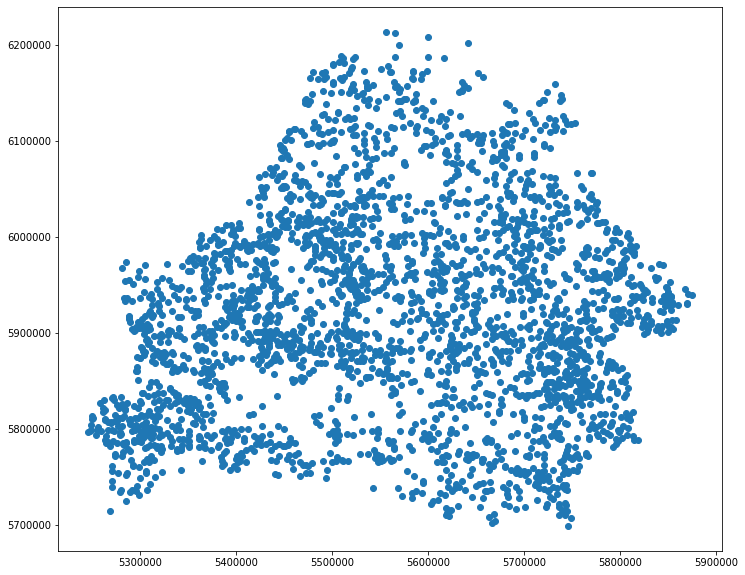

In [3]:
%matplotlib inline
import geopandas as gpd

pts = gpd.GeoDataFrame.from_file('data/Chernobyl-soil-subsample1994/Subsample_1994_CS137.shp')
pts.plot(figsize=(20,10))

In [2]:
print(pts)

         FID          X          Y  CS137_CI_K  \
0        0.0  5748692.0  5826547.0        1.10   
1        1.0  5341424.5  5829805.0        0.17   
2        2.0  5813922.0  5788012.0        0.15   
3        3.0  5730122.0  5847307.5        2.22   
4        4.0  5457269.0  5966588.0        0.31   
5        5.0  5852512.5  5923202.5        0.44   
6        6.0  5581034.5  5880985.0        0.14   
7        7.0  5318964.5  5799666.5        0.04   
8        8.0  5312493.5  5790347.5        0.04   
9        9.0  5762949.0  5840206.0        6.58   
10      10.0  5753579.5  5972583.0        0.54   
11      11.0  5299783.0  5791506.0        0.04   
12      12.0  5390620.5  5784537.0        0.07   
13      13.0  5656243.5  5768615.0        0.97   
14      14.0  5691744.0  5836429.5        1.16   
15      15.0  5434603.0  5794026.0        0.30   
16      16.0  5356329.5  5972872.0        0.04   
17      17.0  5726367.5  5848026.5        2.30   
18      18.0  5309376.5  5889847.5        0.08   


## IDW - Inverse Distance Weighted  <a name="idw"> </a>

loading and display of a spatial dataset

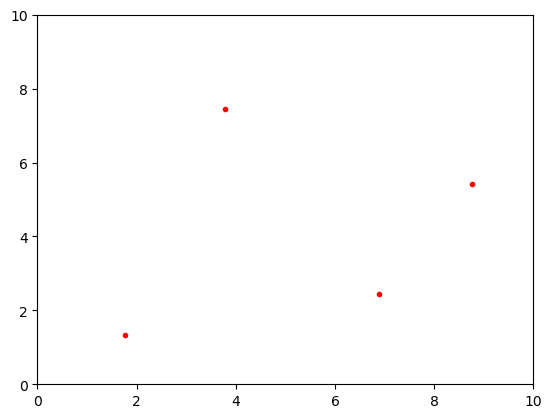

[[0.         6.45112393 5.23130003 8.10877303]
 [6.45112393 0.         5.89152782 5.37408597]
 [5.23130003 5.89152782 0.         3.53192582]
 [8.10877303 5.37408597 3.53192582 0.        ]]
[0.12332322 0.18607815 0.28313165]
0.5925330288574343


In [1288]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X=np.array([[1.77,3.78,6.88,8.76]])
Y=np.array([[1.32,7.45,2.44,5.43]])
plt.plot(X,Y,'r.')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()
Z=np.array([[20,10,35,45]])
Xa,Xb=np.meshgrid(X,X)
Ya,Yb=np.meshgrid(Y,Y)
Dist=np.sqrt( (Xa-Xb)**2 + (Ya-Yb)**2  )
print(Dist)
print(60*'=')
print(1/(Dist[3,:-1]))
print(np.sum(1/(Dist[3,:-1])))

In [1261]:
Igrid=np.arange(0,11,1)
XG,YG=np.meshgrid(Igrid,Igrid)

In [1262]:
len(XG)**2

121

In [1263]:
X2=np.append(X.T,XG.reshape(len(XG)**2,1))
Y2=np.append(Y.T,YG.reshape(len(YG)**2,1))

In [1264]:
len(X2)

126

In [1265]:
Xa,Xb=np.meshgrid(X2,X2)
Ya,Yb=np.meshgrid(Y2,Y2)
DistMat=np.sqrt( (Xa-Xb)**2 + (Ya-Yb)**2  )

In [1266]:
DistMat[:10,:5]

array([[ 0.        ,  6.45112393,  5.23130003,  8.10877303,  4.52919419],
       [ 6.45112393,  0.        ,  5.89152782,  5.37408597,  3.67306412],
       [ 5.23130003,  5.89152782,  0.        ,  3.53192582,  2.28580402],
       [ 8.10877303,  5.37408597,  3.53192582,  0.        ,  3.67164813],
       [ 4.52919419,  3.67306412,  2.28580402,  3.67164813,  0.        ],
       [ 2.20800815,  8.3540948 ,  7.29986301, 10.30643003,  6.73671285],
       [ 1.52816884,  7.95178596,  6.36616054,  9.47114037,  5.97689719],
       [ 1.33988806,  7.65969321,  5.45600587,  8.67078428,  5.29748053],
       [ 1.80424499,  7.49072093,  4.58344848,  7.91596488,  4.73321244],
       [ 2.59138959,  7.45324761,  3.7746523 ,  7.22097639,  4.3293533 ]])

In [1267]:
DistMat.shape

(126, 126)

In [1268]:
X2.shape

(126,)

In [1269]:
len(range(len(X2)))

126

In [1273]:
IDWRaster=np.zeros((len(XG)**2,1))

In [1271]:
IDWRaster.shape

(121, 1)

In [1272]:
IDWRaster[:4,:]=Z.T

In [1274]:
IDWRaster[:5,:]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [1275]:
np.dot(Z,DistMat[121+4,:4])

array([805.78595773])

In [1277]:
1/(DistMat[120,:4])

array([0.10797392, 0.35375465, 0.12836558, 0.16897655])

Text(8.86, 5.53, '4')

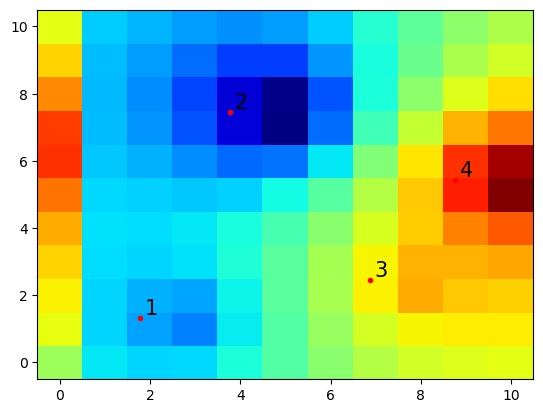

In [1289]:
print(60*'=')
for i in range(len(XG)**2):
    D=DistMat[i+4,:4]
    #print(1/(Dist[i+4,:4]), np.sum(1/(Dist[i+4,:4])) , np.dot(Z,1/(Dist[i+4,:4]))/(np.sum(1/(Dist[i+4,:4]))) )  
    IDWRaster[i]=np.dot(Z,1/D)/(np.sum(1/D))
    
#print(np.sum(1/(Dist[10,0:4])))
#print(IDWRaster[2:8,2:8])
plt.pcolor(XG,YG,IDWRaster.reshape(len(XG),len(XG)), cmap='jet')
plt.plot(X,Y,'r.')
plt.text(1.87, 1.42, str(1), fontsize=15)
plt.text(3.88, 7.55, str(2), fontsize=15)
plt.text(6.98, 2.54, str(3), fontsize=15)
plt.text(8.86, 5.53, str(4), fontsize=15)


In [1292]:
print(IDWRaster[3])
print(IDWRaster[6])


[23.68096912]
[28.18923235]


[[1 1 3 2]
 [1 1 3 2]
 [1 1 3 2]
 [1 1 3 2]]
[[1 1 1 1]
 [1 1 1 1]
 [3 3 3 3]
 [2 2 2 2]]
[[0 0 4 1]
 [0 0 4 1]
 [4 4 0 1]
 [1 1 1 0]]
[[1 2 3 1]
 [1 2 3 1]
 [1 2 3 1]
 [1 2 3 1]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [1 1 1 1]]
[[0 1 4 0]
 [1 0 1 1]
 [4 1 0 4]
 [0 1 4 0]]
[[0 1 8 1]
 [1 0 5 2]
 [8 5 0 5]
 [1 2 5 0]]
[[0.         1.         2.82842712 1.        ]
 [1.         0.         2.23606798 1.41421356]
 [2.82842712 2.23606798 0.         2.23606798]
 [1.         1.41421356 2.23606798 0.        ]]


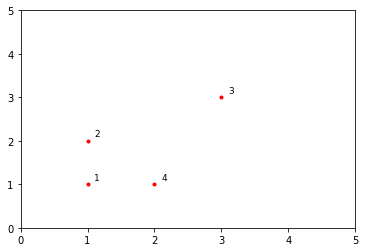

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X=[1,1,3,2]
Y=[1,2,3,1]
L=[1,2,3,4]
plt.plot(X,Y,'r.')
plt.text(1.1, 1.1, str(1), fontsize=9)
plt.text(1.1, 2.1, str(2), fontsize=9)
plt.text(3.1, 3.1, str(3), fontsize=9)
plt.text(2.1, 1.1, str(4), fontsize=9)


plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show

X1,X2=np.meshgrid(X,X)
Y1,Y2=np.meshgrid(Y,Y)
Dist=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )

print(X1)
print(60*'=')
print(X2)
print(60*'=')
print((X1-X2)**2)
print(80*'=')
print(Y1)
print(60*'=')
print(Y2)
print(80*'=')
print((Y1-Y2)**2)
print(60*'=')
print((X1-X2)**2+(Y1-Y2)**2)

print(100*'=')
print(Dist)
print(60*'=')
#print(1/(Dist[4,:-1]))
#print(np.sum(1/(Dist[4,:-1])))

- make data structures in pandas dataframes........................................................done
- calculate IDW with distance matrix and directly into the pandas df....................
- calculate IDW without using a loop....................................................
- compare plots of IDW..................................................................done
- use scipy KDTree and calc/validate the resalts of IDW...
- calculate Kriging clean up and comment.....................................
- calculate Kriging variance and plot it................
- install pyKrige and calculate/validate the results...............................................done 
- install and validate with gstools.......................

IDW with a more complex example
==

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]})
f = df.set_axis(['X', 'Y', 'Z'], axis=1, inplace=False)

In [434]:
df

A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

In [578]:
import scipy.io as sio
import pandas as pd
geo_stats=sio.loadmat('data/geo_stats.mat')
#print(A_01['A_Train'][0:10,15:])
print(geo_stats['x'][0:5])
print(geo_stats['y'][0:5])
print(geo_stats['z'][0:5])
print(np.shape(geo_stats['y']))

# Import and save it to a pandas dataframe
#label=['x','y','z']
Data=pd.DataFrame(np.hstack( (geo_stats['x'], geo_stats['y'], geo_stats['z'])  ) ).set_axis(['x','y','z'], axis=1,copy=True ) 
#Data=Data.set_axis(['x','y','z'], axis=1,copy=True )

[[ 23.07]
 [ 97.63]
 [ 94.59]
 [197.47]
 [ 88.49]]
[[178.32]
 [  4.69]
 [  9.21]
 [ 64.05]
 [ 11.85]]
[[7.84597032]
 [7.52358305]
 [7.25145665]
 [7.09738927]
 [6.94028051]]
(149, 1)


In [876]:
type(geo_stats)

dict

In [579]:
Data['x']

0       23.07
1       97.63
2       94.59
3      197.47
4       88.49
        ...  
144     65.18
145     32.31
146      1.54
147    112.48
148    163.84
Name: x, Length: 149, dtype: float64

In [877]:
Data['z']

0      7.845970
1      7.523583
2      7.251457
3      7.097389
4      6.940281
         ...   
144    3.719857
145    7.677749
146    7.096675
147    7.217232
148    7.047182
Name: z, Length: 149, dtype: float64

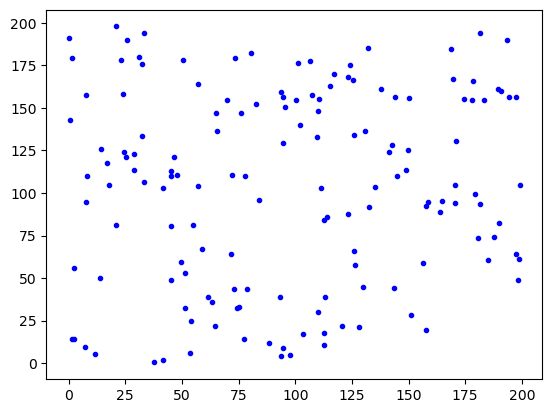

In [580]:
plt.plot(Data['x'],Data['y'],'b.')
#plt.plot(geo_stats['x'],geo_stats['y'],'b.')

In [581]:
X1,X2=np.meshgrid(Data['x'],Data['x'])
Y1,Y2=np.meshgrid(Data['y'],Data['y'])
DistIDW=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )

In [879]:
DistIDW.shape

(149, 149)

In [878]:
DistIDW

array([[  0.        , 188.96182286, 183.6118256 , ..., 165.47660197,
        183.96835733, 166.81259815],
       [188.96182286,   0.        ,   5.44720112, ...,  96.56439147,
         19.63784611, 107.05896039],
       [183.6118256 ,   5.44720112,   0.        , ...,  93.18639439,
         19.73425955, 105.51452317],
       ...,
       [165.47660197,  96.56439147,  93.18639439, ...,   0.        ,
        110.98877286, 178.61123957],
       [183.96835733,  19.63784611,  19.73425955, ..., 110.98877286,
          0.        ,  87.8560641 ],
       [166.81259815, 107.05896039, 105.51452317, ..., 178.61123957,
         87.8560641 ,   0.        ]])

In [582]:
grid=np.arange(0,205,5)
XG1,XG2=np.meshgrid(grid,grid)
#DistIDW[:,0:3]
xg1=XG1.reshape(len(grid)**2,1)
xg2=XG2.reshape(len(grid)**2,1)
#ZgIDW=np.zeros((len(grid)**2,1))  # this is the grid values that will be calculated via IDW/Kriging.... we can do that directly into the pandas Dataframe 


In [882]:
grid

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200])

generate a grid of 5m cellsize and add/append the x/y coodinates of the grid to the dataframe


In [907]:
Data2=pd.concat([ Data, pd.DataFrame(np.hstack( (xg1, xg2, np.zeros((len(grid)**2,1))  )   ) ).set_axis(['x','y','z'], axis=1,copy=True)  ],axis=0, ignore_index=True)

Data2.shape

(1830, 3)

In [585]:
Data2[145:165]['z']

145    7.677749
146    7.096675
147    7.217232
148    7.047182
149    0.000000
150    0.000000
151    0.000000
152    0.000000
153    0.000000
154    0.000000
155    0.000000
156    0.000000
157    0.000000
158    0.000000
159    0.000000
160    0.000000
161    0.000000
162    0.000000
163    0.000000
164    0.000000
Name: z, dtype: float64

In [892]:
Data2[145:235]['y']

145    176.07
146     14.25
147     17.54
148     88.82
149      0.00
        ...  
230      5.00
231     10.00
232     10.00
233     10.00
234     10.00
Name: y, Length: 90, dtype: float64

Calculate the Distance between all points again

In [893]:
X1,X2=np.meshgrid(Data2['x'],Data2['x'])
Y1,Y2=np.meshgrid(Data2['y'],Data2['y'])
DistIDW2=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )

#k=0.5    # 0.5 referrs to the .... 2 is the Factor for IDW (Gewichtsexponent/ power parameter/ or Shepard's Power)
#DistIDW2=( (X1-X2)**2 + (Y1-Y2)**2  )**k

In [894]:
DistIDW2.shape

(1830, 1830)

In [587]:
#DistIDW2[149,:149]
DistIDW2[149:,:149].shape  # This part of the Dist-matrix we can use for another approach to calculate IDW without using a loop!  


(1681, 149)

now some tests to validate the results...

In [526]:
len(xg1)+149

1830

In [518]:
np.sqrt((Data['x'] - xg1[0])**2 +  (Data['y'] - xg2[0])**2) #/(np.sum(1/(np.sqrt((Data['x'] - xg1[k])**2 +  (Data['y'] - xg2[k])**2))

0      179.806138
1       97.742585
2       95.037320
3      207.597696
4       89.279912
          ...    
144    160.884743
145    179.010003
146     14.332972
147    113.839369
148    186.366676
Length: 149, dtype: float64

In [529]:
Data['z'].shape

(149,)

In [574]:
np.sort(DistIDW2[149+2,:149])[:12]

array([ 5.94428297, 10.00134491, 15.99233879, 16.57208798, 27.65318969,
       31.47081346, 43.79680468, 50.41892105, 50.46740829, 52.70160244,
       56.49867344, 58.87724943])

In [582]:
idx=np.argsort(DistIDW2[149+2,:149])[:12]
Data['z'][idx]

33     6.126058
10     6.776157
11     6.857698
146    7.096675
100    5.171739
80     5.385754
105    4.868065
63     5.535440
94     5.190750
27     6.179908
41     5.905325
59     5.527250
Name: z, dtype: float64

In [581]:
DistIDW2[149+2,59]

58.877249426242734

In [915]:
Data2['z'] #[145:158]

0       7.845970
1       7.523583
2       7.251457
3       7.097389
4       6.940281
          ...   
1825    5.489007
1826    5.531772
1827    5.578106
1828    5.608987
1829    5.613095
Name: z, Length: 1830, dtype: float64

In [574]:
for i in range(2): print(i)

0
1


In [912]:
for k in range(len(xg1)):
    D=np.sort(DistIDW2[k+149,:149])[:12]     #....... these are the 12 nearest Points from the correct row of the DIST-Matrix
    #print('D: ', D)
    idxD=np.argsort(DistIDW2[k+149,:149])[:12]   #... these are the index values of the Points, to get the right z -values
    #print('idxD: ', idxD)
    Data2['z'][k+149]=np.dot(Data['z'][idxD],(1/D))/(np.sum(1/D))
    #print('Data2[z]: ', Data2['z'][k+149])

In [919]:
np.sort(DistIDW2[149,:149])[:12]

array([12.08415905, 13.02821937, 14.11930947, 14.33297248, 37.65234256,
       41.45373445, 52.17343769, 53.71368634, 56.05622267, 59.36799896,
       60.89711734, 66.41786582])

In [978]:
%%timeit
for k in range(len(xg1)):
#for k in range(3):
    
    #D=DistIDW2[k+149,:149]
    D=np.sort(DistIDW2[k+149,:149])[:12]     #....... these are the 12 nearest Points from the correct row of the DIST-Matrix
    #print('D: ', D)
    idxD=np.argsort(DistIDW2[k+149,:149])[:12]   #... these are the index values of the Points, to get the right z -values
    #print('idxD: ', idxD)
    #ZgIDW[k]=np.dot(Data['z'][idxD],(1/D))/(np.sum(1/D))
    Data2['z'][k+149]=np.dot(Data['z'][idxD],(1/D))/(np.sum(1/D))
    #print('Data2[z][k]: ', Data2['z'][k+149])
    #print('1/D: Weights' , 1/D)
    #print('Data[z][idxD]:', Data['z'][idxD])
    #print('Sum(1/D): ' , np.sum(1/D))
    #print('Weights*zValues :',np.dot(Data['z'][idxD],(1/D)))
    #print('Data2[z][k]: ', np.dot(Data['z'][idxD],(1/D))/(np.sum(1/D)))
    #print(70*'-')
    #Zg[k]=np.dot(Data['z'],1/(np.sqrt((Data['x'] - xg1[k])**2 +  (Data['y'] - xg2[k])**2)))/(np.sum(1/(np.sqrt((Data['x'] - xg1[k])**2 +  (Data['y'] - xg2[k])**2))))

    #instead of ZgIDW the result can be directly filled to the pandas Dataframe 
    
    
#Refercnces:  
#            - https://numpy.org/doc/stable/reference/generated/numpy.argsort.html    
#            - https://numpy.org/doc/stable/reference/generated/numpy.sort.html  

341 ms ± 3.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [967]:
D

array([  4457.2184354 ,  23804.64410353, 173305.60944549, 287827.40481825,
       291616.56765291, 307635.39504495, 371373.02426963, 393417.05999687,
       413879.30222398, 537377.03413956, 620235.74752221, 650124.72285351])

In [968]:
idxD

array([ 52,  82, 139,  95,  97,  72,  16,  56,  75,  50,  61,  78])

In [938]:
Data2['z'][149:]

149     6.279924
150     6.259263
151     6.194317
152     6.105419
153     5.995205
          ...   
1825    5.489007
1826    5.531772
1827    5.578106
1828    5.608987
1829    5.613095
Name: z, Length: 1681, dtype: float64

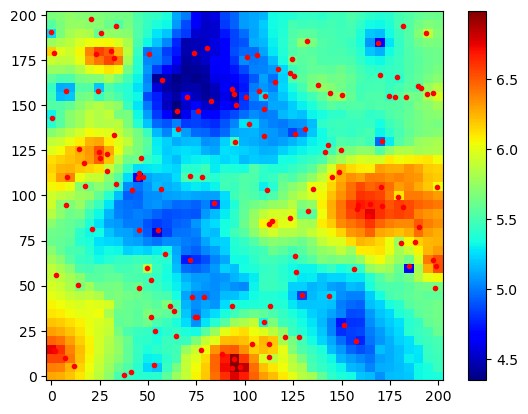

In [943]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,Data2['z'][149:].to_numpy().reshape(len(grid),len(grid)), cmap='jet')
plt.plot(Data['x'],Data['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()


In [945]:
Data2['z'][149:].to_numpy().reshape(len(grid),len(grid))[0,0:2]

array([6.27992416, 6.25926293])

In [1038]:
np.dot(1/WeightsMat,DataMat[IndexMat.T,np.arange(len(XG1)**2)]).shape

(1681, 1681)

In [1036]:
1/0.4

2.5

Now calculate the IDW without using a loop but only the Matrix structures from above
--

In [1028]:
X1,X2=np.meshgrid(Data2['x'],Data2['x'])
Y1,Y2=np.meshgrid(Data2['y'],Data2['y'])
#DistIDW2=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )

k=1/0.4    # Exponent: 0.5 referrs to the .... k=2 is the Factor for IDW (Gewichtsexponent/ power parameter/ or Shepard's Power)
DistIDW2=( (X1-X2)**2 + (Y1-Y2)**2  )**k

In [1029]:
#%%timeit
DataMat   = np.tile(Data['z'].T,(len(XG1)**2,1)).T     # this creates a Matrix with 41*41 columns (len(XG1)**2 = number of grid pixels) repeated of the Data vector z-values
IndexMat  = np.argsort(DistIDW2[149:,:149])[:,:12]     # This is the index of the 12 nearest Points which corresponds to each grid location
WeightsMat= np.sort(DistIDW2[149:,:149])[:,:12]        # This is the 12 shortes distances weights of the 12 nearest Points in a separate Matrix 
GridIDW   = np.diag(np.dot(1/WeightsMat,DataMat[IndexMat.T,np.arange(len(XG1)**2)]))/np.sum(1/WeightsMat,axis=1)

In [1018]:
GridIDW[0:2]

array([6.49702838, 6.4513697 ])

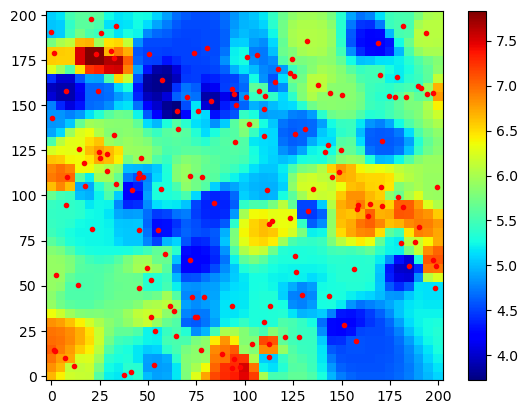

In [1030]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,GridIDW.reshape(len(grid),len(grid)), cmap='jet')
plt.plot(Data['x'],Data['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()

In [950]:
DataMat.shape

(149, 1681)

In [951]:
IndexMat.shape

(1681, 12)

In [952]:
WeightsMat.shape

(1681, 12)

In [953]:
GridIDW.shape

(1681,)

In [643]:
#DistIDW2[149:,:149]  # holds all the distance values that we need for calculating the weights

IDWMat=np.zeros((len(XG1)**2,149))  # adding one row for the calculated results and the Distance Matrix to the rest
IDWMat=DistIDW2[149:,:149]          # this adds the distances from each grid cell to each data point from the corresponding Part of the DistMatrix

DataMat   = np.tile(Data['z'].T,(len(XG1)**2,1)).T     # this creates a Matrix with 41*41 columns (len(XG1)**2 = number of grid pixels) repeated of the Data vector z-values
IndexMat  = np.argsort(IDWMat)[:,:12]                  # This is the index of the 12 nearest Points which corresponds to each grid location
WeightsMat= np.sort(IDWMat)[:,:12]                     # This is the 12 shortes distances weights of the 12 nearest Points in a separate Matrix 

ZgIDW2=np.diag(np.dot(1/WeightsMat,DataMat[IndexMat.T,np.arange(len(XG1)**2)]))/np.sum(1/WeightsMat,axis=1)

# and here is the magic to compute the correct sum and products via algebraic computations
# 1/WeightsMat is a (1681, 12) Matrix holding in each row the coorect weights to compute each IDW Sum
# DataMat[IndexMat.T,np.arange(len(XG1)**2)] selects the correct datapoints corresponding to the weights from each column of DataMat

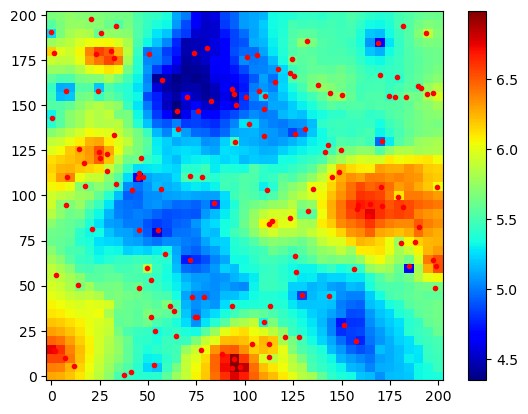

In [644]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,ZgIDW2.reshape(len(grid),len(grid)), cmap='jet')
plt.plot(Data['x'],Data['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()

**Test for the first 2 grid locations**

These are the results from the loop above for k=0,1 

D:  [12.08415905 13.02821937 14.11930947 14.33297248 37.65234256 41.45373445
 52.17343769 53.71368634 56.05622267 59.36799896 60.89711734 66.41786582]
idxD:  [ 10  33  11 146 100  80  63 105  41  94  27  62]
ZgIDW[k]:  [6.27992416]
D:  [ 8.80536768  9.9008535  14.23217833 14.66404105 32.65270127 36.46110393
 48.75100102 51.05945162 54.87038637 56.0553307  56.72705615 63.11602728]
idxD:  [ 33  10  11 146 100  80 105  63  94  41  27  62]
ZgIDW[k]:  [6.25926293]


In [590]:
IDWMat.shape

(1681, 150)

In [591]:
IndexMat=  np.argsort(IDWMat[:,1:])[:,:12] 

In [594]:
IndexMat[0:2,:]

array([[ 10,  33,  11, 146, 100,  80,  63, 105,  41,  94,  27,  62],
       [ 33,  10,  11, 146, 100,  80, 105,  63,  94,  41,  27,  62]])

In [602]:
WeightsMat= np.sort(IDWMat[:,1:])[:,:12]

In [614]:
1/WeightsMat[0:2,:]

array([[0.08275297, 0.07675646, 0.07082499, 0.0697692 , 0.02655877,
        0.02412328, 0.01916684, 0.01861723, 0.01783923, 0.01684409,
        0.01642114, 0.01505619],
       [0.11356709, 0.10100139, 0.07026331, 0.06819403, 0.03062534,
        0.02742649, 0.0205124 , 0.01958501, 0.01822477, 0.01783952,
        0.01762827, 0.01584384]])

In [595]:
DataMat= np.tile(Data['z'].T,(len(XG1)**2,1)).T 

In [612]:
DataMat[IndexMat.T,np.arange(len(XG1)**2)][:,0:2]

array([[6.77615713, 6.12605816],
       [6.12605816, 6.77615713],
       [6.85769793, 6.85769793],
       [7.09667503, 7.09667503],
       [5.17173873, 5.17173873],
       [5.38575364, 5.38575364],
       [5.53544032, 4.86806529],
       [4.86806529, 5.53544032],
       [5.90532456, 5.19075038],
       [5.19075038, 5.90532456],
       [6.17990816, 6.17990816],
       [5.6867026 , 5.6867026 ]])

In [632]:
np.diag(np.dot(1/WeightsMat[0:2,:],DataMat[IndexMat.T,np.arange(len(XG1)**2)][:,0:2]))/np.sum(1/WeightsMat[0:2,:],axis=1)

array([6.27992416, 6.25926293])

In [642]:
WeightsMat.shape

(1681, 12)

In [629]:
2.85567237/0.45473039

6.279924176609354

In [630]:
3.2592699/0.52071145

6.259262975684519

In [628]:
np.sum(1/WeightsMat[0:2,:],axis=1)

array([0.45473039, 0.52071145])

In [492]:
IndexMat=  np.argsort(1/IDWMat[:,1:])[:,-12:]

In [499]:
IndexMat[:,:].T.shape

(12, 1681)

In [508]:
WeightsMat= np.sort(1/IDWMat[:,1:])[:,-12:] 

In [539]:
np.flip(WeightsMat,1)

array([[0.08275297, 0.07675646, 0.07082499, ..., 0.01684409, 0.01642114,
        0.01505619],
       [0.11356709, 0.10100139, 0.07026331, ..., 0.01783952, 0.01762827,
        0.01584384],
       [0.16822887, 0.09998655, 0.06252994, ..., 0.01897476, 0.01769953,
        0.01698449],
       ...,
       [0.09604252, 0.0940211 , 0.03822888, ..., 0.02172838, 0.02126133,
        0.0212224 ],
       [0.09919844, 0.06789836, 0.03295911, ..., 0.02128048, 0.0205909 ,
        0.02041881],
       [0.08447844, 0.05161151, 0.02878543, ..., 0.02063592, 0.01978367,
        0.0195117 ]])

In [482]:
DataMat= np.tile(Data['z'].T,(len(XG1)**2,1)).T 

In [566]:
DataMat[IndexMat.T,np.arange(len(XG1)**2)][:,0:3].T.shape

(3, 12)

In [570]:
ZgIDW2=np.diag(np.dot(DataMat[IndexMat.T,np.arange(len(XG1)**2)].T,np.flip(WeightsMat,1).T))

In [554]:
ZgIDW[0:5]

array([[6.27992416],
       [6.25926293],
       [6.19431688],
       [6.10541905],
       [5.99520504]])

In [572]:
ZgIDW2[0:5]/IDWMat[:5,0]

array([5.60661427, 5.63313465, 5.56771756, 5.5319765 , 5.54509262])

In [479]:
# select different indices from each column of a matrix
A=np.arange(25).reshape(5,5)
b=np.array([[0,2,3],[1,3,4],[1,2,3],[1,3,4],[0,1,4]])
c=np.array([0,1,2,3,4])
print(b)

[[0 2 3]
 [1 3 4]
 [1 2 3]
 [1 3 4]
 [0 1 4]]


In [533]:
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [538]:
np.flip(A,1)

array([[ 4,  3,  2,  1,  0],
       [ 9,  8,  7,  6,  5],
       [14, 13, 12, 11, 10],
       [19, 18, 17, 16, 15],
       [24, 23, 22, 21, 20]])

In [517]:
np.diag(A)

array([ 0,  6, 12, 18, 24])

In [481]:
A[b.T,c]

array([[ 0,  6,  7,  8,  4],
       [10, 16, 12, 18,  9],
       [15, 21, 17, 23, 24]])

In [419]:
np.argsort(IDWMat[:,1:])[:,:12][5].T

array([100,  33,  80,  10,  11, 146, 105,  94,  27,  59,  63,  62])

In [443]:
DataMat[:,10:15][np.argsort(IDWMat[:,1:])[:,:12][0].T]

#a=[[0,3]]
#b=np.zeros((5,5))


array([[6.77615713, 6.77615713, 6.77615713, 6.77615713, 6.77615713],
       [6.12605816, 6.12605816, 6.12605816, 6.12605816, 6.12605816],
       [6.85769793, 6.85769793, 6.85769793, 6.85769793, 6.85769793],
       [7.09667503, 7.09667503, 7.09667503, 7.09667503, 7.09667503],
       [5.17173873, 5.17173873, 5.17173873, 5.17173873, 5.17173873],
       [5.38575364, 5.38575364, 5.38575364, 5.38575364, 5.38575364],
       [5.53544032, 5.53544032, 5.53544032, 5.53544032, 5.53544032],
       [4.86806529, 4.86806529, 4.86806529, 4.86806529, 4.86806529],
       [5.90532456, 5.90532456, 5.90532456, 5.90532456, 5.90532456],
       [5.19075038, 5.19075038, 5.19075038, 5.19075038, 5.19075038],
       [6.17990816, 6.17990816, 6.17990816, 6.17990816, 6.17990816],
       [5.6867026 , 5.6867026 , 5.6867026 , 5.6867026 , 5.6867026 ]])

In [415]:
b[]=True

SyntaxError: invalid syntax (2326227712.py, line 1)

In [412]:
b

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [319]:
id05=np.argsort(1/IDWMat[:,1:])[:,-12:][0:3]

In [325]:
id05.T

array([[ 62,  62,  59],
       [ 27,  27,  41],
       [ 94,  41,  27],
       [ 41,  94,  94],
       [105,  63,  63],
       [ 63, 105, 105],
       [ 80,  80,  80],
       [100, 100, 100],
       [146, 146, 146],
       [ 11,  11,  11],
       [ 33,  10,  10],
       [ 10,  33,  33]])

In [340]:
DataMat[id05].T

array([[[5.6867026 , 5.6867026 , 5.52725004],
        [6.17990816, 6.17990816, 5.90532456],
        [5.19075038, 5.90532456, 6.17990816],
        ...,
        [6.85769793, 6.85769793, 6.85769793],
        [6.12605816, 6.77615713, 6.77615713],
        [6.77615713, 6.12605816, 6.12605816]],

       [[5.6867026 , 5.6867026 , 5.52725004],
        [6.17990816, 6.17990816, 5.90532456],
        [5.19075038, 5.90532456, 6.17990816],
        ...,
        [6.85769793, 6.85769793, 6.85769793],
        [6.12605816, 6.77615713, 6.77615713],
        [6.77615713, 6.12605816, 6.12605816]],

       [[5.6867026 , 5.6867026 , 5.52725004],
        [6.17990816, 6.17990816, 5.90532456],
        [5.19075038, 5.90532456, 6.17990816],
        ...,
        [6.85769793, 6.85769793, 6.85769793],
        [6.12605816, 6.77615713, 6.77615713],
        [6.77615713, 6.12605816, 6.12605816]],

       ...,

       [[5.6867026 , 5.6867026 , 5.52725004],
        [6.17990816, 6.17990816, 5.90532456],
        [5.19075038, 5

In [286]:
1/IDWMat[:3,1:5]

array([[0.00556155, 0.01023096, 0.01052218, 0.00481701],
       [0.00557932, 0.01078183, 0.01110344, 0.00492981],
       [0.00559289, 0.01139531, 0.01175228, 0.00504771]])

In [282]:
np.sort(IDWMat[0,1:])[:13]

array([12.08415905, 13.02821937, 14.11930947, 14.33297248, 37.65234256,
       41.45373445, 52.17343769, 53.71368634, 56.05622267, 59.36799896,
       60.89711734, 66.41786582, 68.24756772])

In [287]:
np.sort(1/IDWMat[0,:])[-12:]

array([0.01642114, 0.01684409, 0.01783923, 0.01861723, 0.01916684,
       0.02412328, 0.02655877, 0.0697692 , 0.07082499, 0.07675646,
       0.08275297, 2.13045669])

In [290]:
idx=np.argsort(1/IDWMat[0,1:])[-12:] 

In [293]:
DataMat[idx,0:3]

array([[5.6867026 , 5.6867026 , 5.6867026 ],
       [6.17990816, 6.17990816, 6.17990816],
       [5.19075038, 5.19075038, 5.19075038],
       [5.90532456, 5.90532456, 5.90532456],
       [4.86806529, 4.86806529, 4.86806529],
       [5.53544032, 5.53544032, 5.53544032],
       [5.38575364, 5.38575364, 5.38575364],
       [5.17173873, 5.17173873, 5.17173873],
       [7.09667503, 7.09667503, 7.09667503],
       [6.85769793, 6.85769793, 6.85769793],
       [6.12605816, 6.12605816, 6.12605816],
       [6.77615713, 6.77615713, 6.77615713]])

In [288]:
WeightsMat[0,:]

array([0.01465254, 0.01505619, 0.01642114, 0.01684409, 0.01783923,
       0.01861723, 0.01916684, 0.02412328, 0.02655877, 0.0697692 ,
       0.07082499, 0.07675646, 0.08275297])

In [283]:
1/0.01465254

68.24755298398776

In [203]:
np.argsort(1/IDWMat[0,1:])[-13:]             # the last value corresponds to the nearest point

array([ 59,  62,  27,  94,  41, 105,  63,  80, 100, 146,  11,  33,  10])

In [251]:
np.sum(np.sort(1/IDWMat[0,1:])[-13:])

0.46938292867550757

In [210]:
Data['z'].shape

(149,)

In [217]:
np.tile(Data['z'],(1,1)).shape

(1, 149)

In [238]:
Data['z']

0      7.845970
1      7.523583
2      7.251457
3      7.097389
4      6.940281
         ...   
144    3.719857
145    7.677749
146    7.096675
147    7.217232
148    7.047182
Name: z, Length: 149, dtype: float64

In [256]:
np.tile(Data['z'].T,(len(XG1)**2,1)).T

(149, 1681)

In [199]:
1/0.08275297

12.084158429600775

In [195]:
np.sum(np.sort(IDWMat[0:3,1:])[:,:12],axis=1)  # this

array([481.29706619, 447.2954989 , 420.39471713])

In [177]:
np.sum(np.sort(IDWMat[0,1:])[:12])

0.04846207178635296

In [171]:
IDWMat[0,0]

1.3966974622009896

In [105]:
test=np.indices((3,3))

In [110]:
np.sum(test[0],axis=1)

array([0, 3, 6])

In [111]:
test[0]

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

In [115]:
np.sum(test[0],axis=0)

array([3, 3, 3])

This is the IDW Plot **without** using the 12 nearest points, but with all points to each grid cell

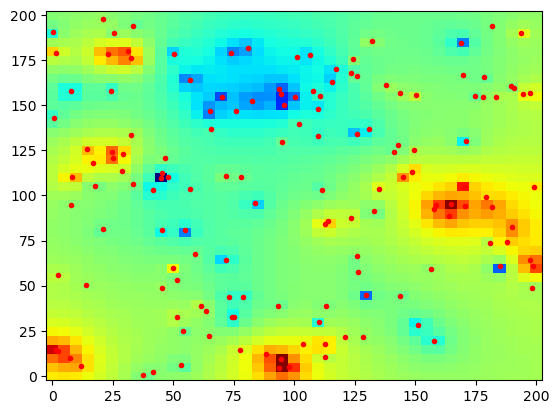

In [463]:
plt.pcolor(XG1,XG2,Zg.reshape(len(grid),len(grid)), cmap='jet')
plt.plot(Data['x'],Data['y'],'r.')

Validate the Result via a custum library for example with SciPy KDTree method


# Kriging with the same Dataset  <a name="kriging"> </a>

In [980]:
import numpy as np
import scipy.io as sio

geo_stats=sio.loadmat('data/geo_stats.mat')
#print(A_01['A_Train'][0:10,15:])
print(geo_stats['x'][0:5])
print(geo_stats['y'][0:5])
print(geo_stats['z'][0:5])
print(np.shape(geo_stats['y']))
print(np.arange(1,150).shape)

# Import and save it to a pandas dataframe
#label=['x','y','z']
Data=pd.DataFrame(np.hstack( (geo_stats['x'], geo_stats['y'], geo_stats['z'])  ) ).set_axis(['x','y','z'], axis=1,copy=True ) 
#Data=Data.set_axis(['x','y','z'], axis=1,copy=True )


[[ 23.07]
 [ 97.63]
 [ 94.59]
 [197.47]
 [ 88.49]]
[[178.32]
 [  4.69]
 [  9.21]
 [ 64.05]
 [ 11.85]]
[[7.84597032]
 [7.52358305]
 [7.25145665]
 [7.09738927]
 [6.94028051]]
(149, 1)
(149,)


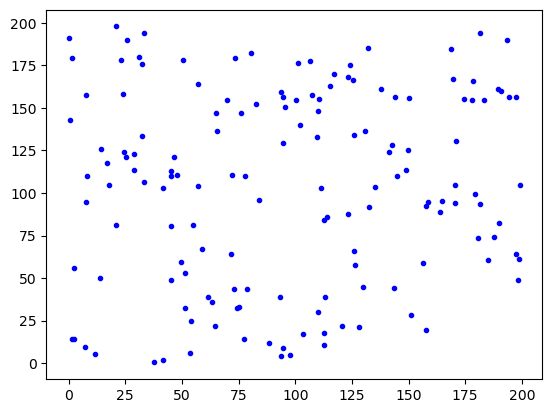

In [981]:
plt.plot(Data['x'],Data['y'],'b.')

In [984]:
np.min(Data['z'])

3.7198573131306736

In [985]:
np.max(Data['z']) 

7.845970316362295

In [987]:
np.var(Data['z'],ddof=1)

0.8103460171361423

In [989]:
Data['z'].var()

0.8103460171361423

In [990]:
Data['z'].mean()

5.567642791175265

In [991]:
Data['z'].sem()

0.07374661940317623

(array([ 5.,  1.,  5.,  7., 12., 10.,  8., 18., 13., 14., 12., 10.,  5.,
         3.,  9.,  7.,  5.,  2.,  1.,  2.]),
 array([3.71985731, 3.92616296, 4.13246861, 4.33877426, 4.54507991,
        4.75138556, 4.95769121, 5.16399686, 5.37030251, 5.57660816,
        5.78291381, 5.98921946, 6.19552512, 6.40183077, 6.60813642,
        6.81444207, 7.02074772, 7.22705337, 7.43335902, 7.63966467,
        7.84597032]),
 <BarContainer object of 20 artists>)

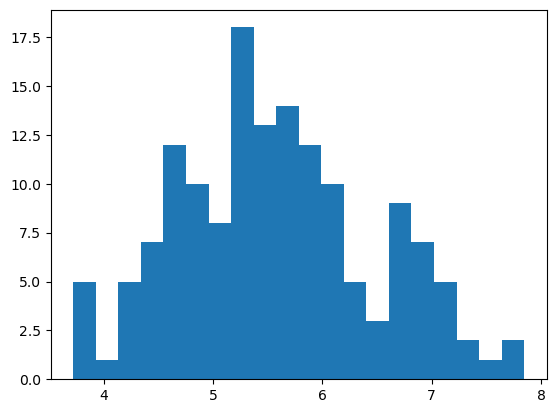

In [1160]:
plt.hist(Data['z'],bins=20)

In [998]:
import scipy.stats as sts

In [999]:
sts.skew(Data['z'])

0.25681295081935546

In [1001]:
sts.kurtosis(Data['z'],fisher=True)

-0.47800148931734077

In [982]:
X1,X2=np.meshgrid(Data['x'],Data['x'])
Y1,Y2=np.meshgrid(Data['y'],Data['y'])
Z1,Z2=np.meshgrid(Data['z'],Data['z'])

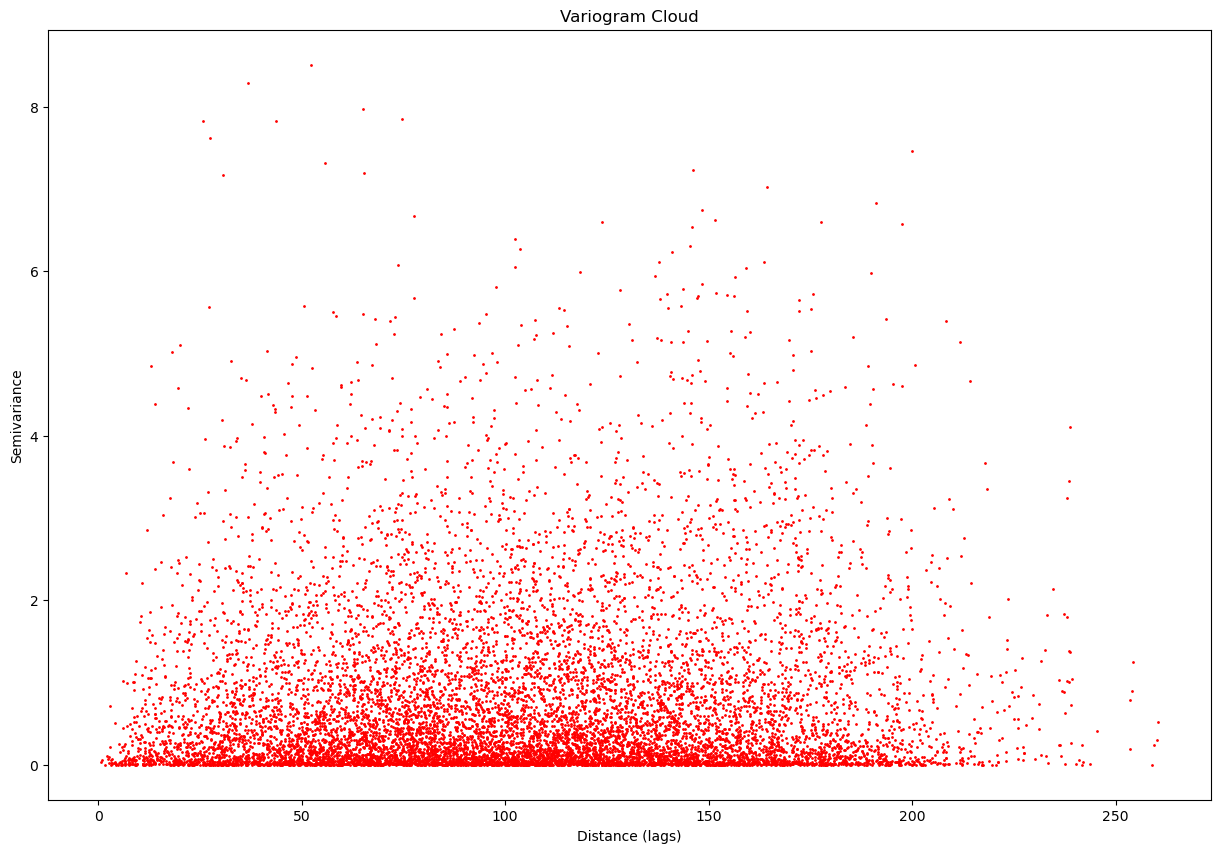

In [1005]:
DistMat = np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  ) 
# This is the DistanceMatrix all Points to all Points! keep in mind that only the upper or lower 
# triangular Matrix is relevant as the distance from point A to Point B is the same as the distance 
# from point B to Point A

G = 0.5*(Z1-Z2)**2     # G is here the variogram or the so called Semi-Variance of the z values at locations (x,y)

Idx=np.arange(1,150)
C,R=np.meshgrid(np.arange(1,150),np.arange(1,150))  # This creates an Index (True/False) Grid to select the lower triangular Matrix from
I= (R > C)                                          # the Dist and G Matrices
plt.figure(figsize=(15,10))
plt.title('Variogram Cloud')
plt.xlabel('Distance (lags)')
plt.ylabel('Semivariance')
plt.plot(DistMat[I],G[I],'r.',markersize=2)     # Distances are plotted on the horizontal and Semivariance on the Vertical Axis


In [1012]:
I

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False]])

In [1006]:
DistMat[I].shape

(11026,)

In [1010]:
DistMat.shape

(149, 149)

In [1057]:
G

array([[0.        , 0.05196677, 0.17672325, ..., 0.28072171, 0.19765612,
        0.31903176],
       [0.05196677, 0.        , 0.03702639, ..., 0.09112523, 0.04692558,
        0.1134792 ],
       [0.17672325, 0.03702639, 0.        , ..., 0.01197868, 0.00058567,
        0.02086416],
       ...,
       [0.28072171, 0.09112523, 0.01197868, ..., 0.        , 0.00726695,
        0.0012248 ],
       [0.19765612, 0.04692558, 0.00058567, ..., 0.00726695, 0.        ,
        0.01445853],
       [0.31903176, 0.1134792 , 0.02086416, ..., 0.0012248 , 0.01445853,
        0.        ]])

Now we need to define/guess the average lag distance by sorting the Distance Matrix, getting the minimum values (distance to its nearest point for every point) and averaging it
---

In [1011]:
DistMat[:5,:3]

array([[  0.        , 188.96182286, 183.6118256 ],
       [188.96182286,   0.        ,   5.44720112],
       [183.6118256 ,   5.44720112,   0.        ],
       [208.50178153, 116.15349844, 116.58353228],
       [178.86318039,  11.61056416,   6.64677365]])

The Distance Matrix has "0" on the diagonal which have to be replaced by the "np.nan" (Not_a_Number) value for the following calculations...

In [1044]:
np.fill_diagonal(DistMat,np.nan)
print(DistMat[:5,:3])

[[         nan 188.96182286 183.6118256 ]
 [188.96182286          nan   5.44720112]
 [183.6118256    5.44720112          nan]
 [208.50178153 116.15349844 116.58353228]
 [178.86318039  11.61056416   6.64677365]]


In [688]:
lag=np.mean(np.nanmin(DistMat, axis=0))     # np.nanmin(...) and np.nanmax(...) ignore any nan values for the calc 

In [689]:
lag

8.010698943460342

**so this is a good guess for the lag distance**

In [1040]:
np.nanmax(DistMat)

260.38016379901137

In [692]:
hmd=np.nanmax(DistMat)/2  # np.nanmin(...) and np.nanmax(...) ignore any nan values for the calc 

In [1039]:
hmd

130.19008189950569

**to calculate the empirical variogram we have to set a maximum border / half the max distance of the datapoints** 

In [695]:
hmd/lag

16.252025299963165

In [712]:
max_lags=np.floor(hmd/lag)    # floor will round the value to the lower end

In [713]:
max_lags

16.0

**how often fits the lag distance in the max distance?**  

In [1045]:
LAGS=np.ceil(DistMat/lag)           # ceil will round the value to the upper end;  

In [1046]:
LAGS[0:10,0:5]                      # LAGS will give us the multiple of the lag distance fitting in the calculated diances to each datapoint

array([[nan, 24., 23., 27., 23.],
       [24., nan,  1., 15.,  2.],
       [23.,  1., nan, 15.,  1.],
       [27., 15., 15., nan, 16.],
       [23.,  2.,  1., 16., nan],
       [24.,  1.,  1., 15.,  2.],
       [25., 16., 16.,  3., 16.],
       [ 9., 18., 17., 25., 16.],
       [23., 16., 16.,  5., 16.],
       [27., 15., 15.,  1., 16.]])

In [1047]:
DistMat[0:4,0:4]

array([[         nan, 188.96182286, 183.6118256 , 208.50178153],
       [188.96182286,          nan,   5.44720112, 116.15349844],
       [183.6118256 ,   5.44720112,          nan, 116.58353228],
       [208.50178153, 116.15349844, 116.58353228,          nan]])

In [1048]:
np.ceil(188.96/8)

24.0

In [736]:
#LAGS==1.
#SEL=(LAGS==1)
#print(np.mean(Dist[SEL]))
#np.sum(SEL)/2
G[SEL]

array([1.88305298, 1.6795724 , 1.99119076, ..., 3.2338385 , 4.07756331,
       3.1760739 ])

In [737]:
DE=np.zeros((int(max_lags)+1))     
PN=np.zeros((int(max_lags)+1))
GE=np.zeros((int(max_lags)+1))
for i in range(1,int(max_lags)+1):           # this loop is going though every lag class from 1 ... 16
    #print(i)
    SEL=(LAGS==i)                            # SEL: this creates a True/False Selection array of distances for the current lag class
    DE[i]=np.mean(Dist[SEL])                 # Dist[SEL]  is a vector of the selcted Distances, that is averaged
    PN[i]=np.sum(SEL)/2                      # np.sum(SEL) will count the number of points that were selceted => half of it is the number of pairs 
    GE[i]=np.mean(G[SEL])                    # G[SEL] is a vector of the selcted variogram values,  that is averaged
    
    
# This gives us an overview of the average variogram estimatior (variogram versus mean separation distances)

In [738]:
print(DE[16],GE[16])

124.24433082952854 0.815715998002641


In [1060]:
PN

array([  0.,  63., 185., 258., 321., 376., 409., 471., 513., 589., 618.,
       614., 600., 598., 633., 648., 583.])

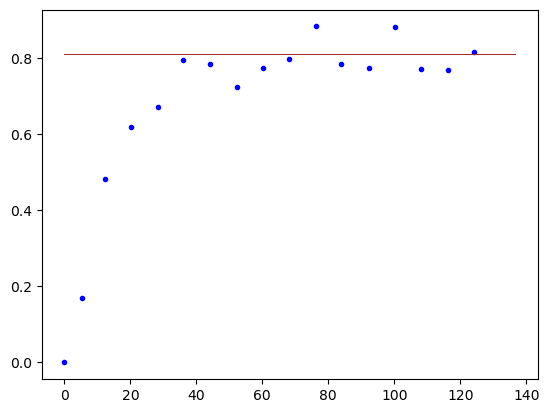

In [1050]:
b=np.array([0,np.max(DE)*1.1 ]) 
c=np.array([np.var(Data['z'],ddof=1),np.var(Data['z'],ddof=1) ]) 

plt.plot(DE,GE,'b.')
plt.plot(b,c,'-',color='brown',linewidth=0.75)

the horizontal brown line in the plot above marks the z values variance of the dataset.

Create and compare different variogramm models

In [764]:
lags[:15]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

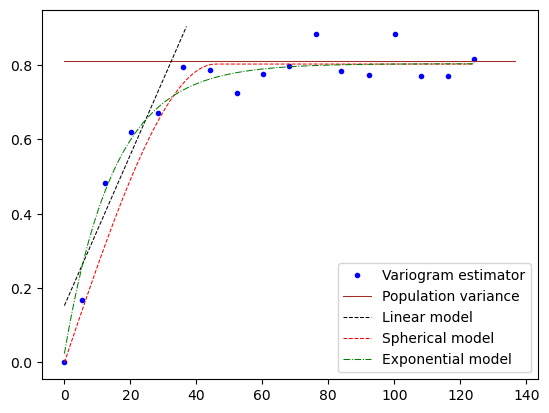

In [774]:
plt.plot(DE,GE,'b.')
plt.plot(b,c,'-',color='brown',linewidth=0.75)

nugget = 0.153
slope = 0.0203
Glin = nugget + slope*lags[:38]
plt.plot(lags[:38],Glin,'--',color='black',linewidth=0.75)


# Spherical model with nugget
Nugget = 0
Sill = 0.803
Range = 45.9
lags = np.arange(np.max(DE))
Gsph = Nugget + (Sill*(1.5*lags/Range - 0.5*(lags/Range)**3)*(lags<=Range) + Sill*(lags>Range))
plt.plot(lags,Gsph,'r--',linewidth=0.75)

#Exponential model with nugget
Nugget = 0.0239
Sill = 0.78
Range = 45;
Gexp = Nugget + Sill*(1 - np.exp(-3*lags/Range))
plt.plot(lags,Gexp,'-.g',linewidth=0.75)

plt.legend(['Variogram estimator','Population variance',\
      'Linear model','Spherical model','Exponential model'])
#These Values for nugget, sill and range are estimated for each model


**The variogram model is a parametric curve fitted to the variogram estimator.**

**Computing the Kriging System**


In [1111]:
def gamma(h):
    Nugget = 0.0239
    Sill = 0.78
    Range = 45
    return Nugget + Sill*(1 - np.exp(-3*h/Range))

In [1113]:
DistMat

array([[         nan, 188.96182286, 183.6118256 , ..., 165.47660197,
        183.96835733, 166.81259815],
       [188.96182286,          nan,   5.44720112, ...,  96.56439147,
         19.63784611, 107.05896039],
       [183.6118256 ,   5.44720112,          nan, ...,  93.18639439,
         19.73425955, 105.51452317],
       ...,
       [165.47660197,  96.56439147,  93.18639439, ...,          nan,
        110.98877286, 178.61123957],
       [183.96835733,  19.63784611,  19.73425955, ..., 110.98877286,
                 nan,  87.8560641 ],
       [166.81259815, 107.05896039, 105.51452317, ..., 178.61123957,
         87.8560641 ,          nan]])

In [1114]:
gamma(DistMat[0:5,:5])

array([[       nan, 0.80389736, 0.80389623, 0.80389928, 0.80389483],
       [0.80389736,        nan, 0.26142219, 0.80356185, 0.44420505],
       [0.80389623, 0.26142219,        nan, 0.80357141, 0.3031156 ],
       [0.80389928, 0.80356185, 0.80357141,        nan, 0.80365253],
       [0.80389483, 0.44420505, 0.3031156 , 0.80365253,        nan]])

In [291]:
len(geo_stats['x'])

149

In [1064]:
A.shape

(150, 150)

this is the design matrix A of the Kriging Model


In [1053]:
A=np.ones((len(Data['x'])+1,len(Data['x'])+1))
A[len(Data['x']),len(Data['x'])]=0
A[:len(Data['x']),:len(Data['x'])]=gamma(DistMat)

In [1055]:
np.fill_diagonal(A,0)

In [1110]:
A[:10,:5]

array([[0.        , 0.80389736, 0.80389623, 0.80389928, 0.80389483],
       [0.80389736, 0.        , 0.26142219, 0.80356185, 0.44420505],
       [0.80389623, 0.26142219, 0.        , 0.80357141, 0.3031156 ],
       [0.80389928, 0.80356185, 0.80357141, 0.        , 0.80365253],
       [0.80389483, 0.44420505, 0.3031156 , 0.80365253, 0.        ],
       [0.80389712, 0.20751115, 0.23902147, 0.80363369, 0.37531687],
       [0.80389794, 0.80365201, 0.80364434, 0.59471707, 0.80369584],
       [0.79646562, 0.80382281, 0.80378927, 0.80389822, 0.80373547],
       [0.80389516, 0.80367402, 0.80365721, 0.71967364, 0.8036972 ],
       [0.80389941, 0.8035545 , 0.80356768, 0.17805983, 0.80365206]])

Now create a grid of 5m cellsize in x and y over the bounding box [0,200] for both coordinate axis. Compare the coordinates of the data geo_stats['x'], len(geo_stats['y'])

In [1115]:
pixel=np.arange(0,205,5)

makes a grid of 41x41 cells

In [1118]:
len(pixel)

41

In [1117]:
XG1,XG2=np.meshgrid(pixel,pixel)

In [364]:
XG1.shape

(41, 41)

In [1121]:
xg1=XG1.reshape(len(pixel)**2,1)
xg2=XG2.reshape(len(pixel)**2,1)
Zg=np.zeros((len(pixel)**2,1))             #the Kriging estimates that are computed
varZg=np.zeros((len(pixel)**2,1))          #the Kriging variance of the Point 

In [1123]:
varZg.shape

(1681, 1)

In [1122]:
print(xg1[2])

[10]


In [1132]:
Data['x'].shape

(149,)

In [1124]:
for k in range(len(xg1)):
    #print(np.sqrt((geo_stats['x'] - xg1[k])**2 +  (geo_stats['y'] - xg2[k])**2).shape)
    b=np.ones((150,1))
    b[:-1]=gamma(np.sqrt((geo_stats['x'] - xg1[k])**2 +  (geo_stats['y'] - xg2[k])**2))
    #print(gamma(np.sqrt((geo_stats['x'] - xg1[k])**2 +  (geo_stats['y'] - xg2[k])**2)).shape)
    w=np.dot(np.linalg.inv(A),b)
    Zg[k]=np.dot(w[:-1].T,geo_stats['z'])
    varZg[k]=np.dot(w.T,b)

In [1133]:
for k in range(len(xg1)):
    b=np.ones((150,1))
    b[:-1]=gamma(np.sqrt((geo_stats['x'] - xg1[k])**2 +  (geo_stats['y'] - xg2[k])**2))
    w=np.dot(np.linalg.inv(A),b)
    Zg[k]=np.dot(w[:-1].T,geo_stats['z'])
    varZg[k]=np.dot(w.T,b)

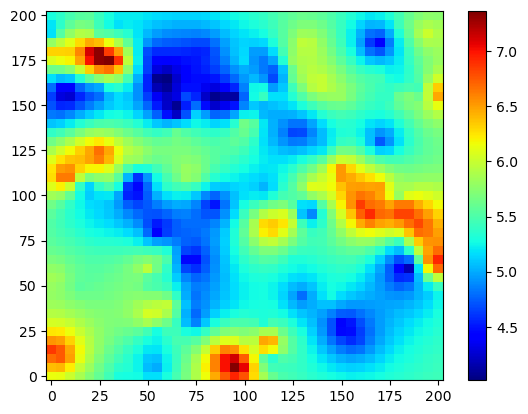

In [1134]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,Zg.reshape(len(grid),len(grid)), cmap='jet')
#plt.plot(Data['x'],Data['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()

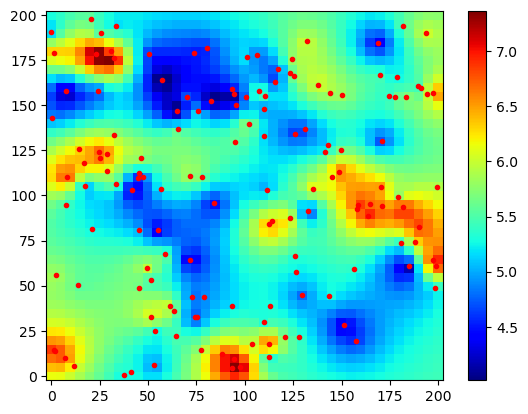

In [1135]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,Zg.reshape(len(grid),len(grid)), cmap='jet')
plt.plot(geo_stats['x'],geo_stats['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()

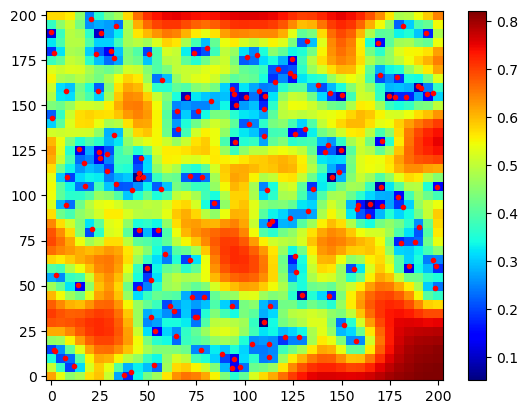

In [1136]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,varZg.reshape(len(grid),len(grid)), cmap='jet')
plt.plot(geo_stats['x'],geo_stats['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()

plot(DE,GE,'o','MarkerFaceColor',[.6 .6 .6])
   var_z = var(z);
   b = [0 max(DE)];
   c = [var_z var_z];
   hold on
   plot(b,c,'--r')
   xlim(b)
   yl = 1.1*max(GE);
   ylim([0 yl])
   
 

   % Linear model with nugget
   nugget = 0.153;
   slope = 0.0203;
   Glin = nugget + slope*lags;
   plot(lags,Glin,'-m')
   xlabel('Distance between observations')
   ylabel('Semivariance')
   legend('Variogram estimator','Population variance',...
      'Sperical model','Exponential model','Linear model')
   hold off

In [777]:
DistIDW2[:149,:149].shape

(149, 149)

In [776]:
DistIDW2[149:,:149].shape

(1681, 149)

In [1137]:
A=np.ones((len(geo_stats['x'])+1,len(geo_stats['x'])+1))
A[len(geo_stats['x']),len(geo_stats['x'])]=0
A[:len(geo_stats['x']),:len(geo_stats['x'])]=gamma(DistIDW2[:149,:149])
np.fill_diagonal(A,0)                                                      # The kriging system needs zero's on the diagonal

In [790]:
A.shape

(150, 150)

In [1143]:
GammaMat=np.ones((1681,150))
GammaMat[:,:-1]=gamma(DistIDW2[149:,:149])         

WeightsMat= np.dot(np.linalg.inv(A),GammaMat.T).T    # There are all the weights for each gridpoint in each col, the last value of the col is the Lagrangian Factor


In [1145]:
np.dot(np.linalg.inv(A),WeightsMat)[-10:,0:2]

ValueError: shapes (150,150) and (1681,150) not aligned: 150 (dim 1) != 1681 (dim 0)

In [824]:
w[-10:]

array([[0.00369495],
       [0.00444161],
       [0.00047292],
       [0.00322598],
       [0.00214505],
       [0.00209125],
       [0.12239345],
       [0.00079886],
       [0.00206421],
       [0.01068479]])

In [827]:
w[-10:]

array([[0.00285006],
       [0.00342601],
       [0.00036478],
       [0.00248832],
       [0.00165456],
       [0.00161306],
       [0.06712935],
       [0.00061557],
       [0.00159221],
       [0.00824159]])

In [860]:
GammaMat[:,:].shape

(1681, 150)

In [869]:
np.diag(np.dot(GammaMat,WeightsMat))

array([0.61929394, 0.53613301, 0.45382753, ..., 0.54443199, 0.58695028,
       0.64756857])

In [1103]:
WeightsMat[:-1,:].T.shape

(1681, 149)

In [1157]:
bMat[200,:]

array([0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
       0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039, 0.8039,
      

In [1150]:
DistIDW2[149:,:149].shape

(1681, 149)

In [1105]:
A=np.ones((len(Data['x'])+1,len(Data['x'])+1))
A[len(Data['x']),len(Data['x'])]=0
A[:len(Data['x']),:len(Data['x'])]=gamma(DistMat)
np.fill_diagonal(A,0) 


bMat=np.ones((len(xg1),len(Data['x'])+1))
bMat[:,:-1]=gamma(DistIDW2[149:,:149]) 
print(bMat.shape)

WeightsMat= np.dot(np.linalg.inv(A),bMat.T)

DataMat   = np.tile(Data['z'].T,(len(xg1),1)).T

Zg2=np.diag(np.dot(WeightsMat[:-1,:].T,DataMat))
varZg2=np.diag(np.dot(bMat,WeightsMat))

(1681, 150)


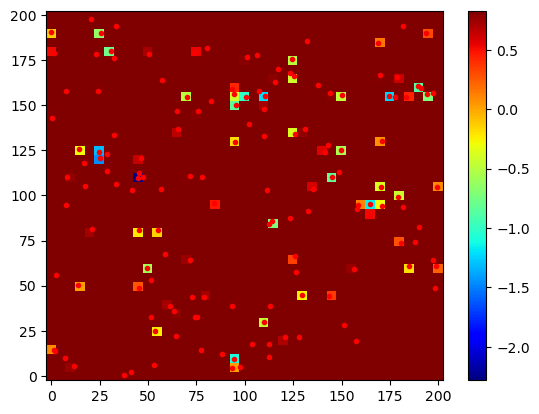

In [1108]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,varZg2.reshape(len(grid),len(grid)), cmap='jet')
plt.plot(Data['x'],Data['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()

In [1091]:
Zg2

array([5.49328099, 5.49328099, 5.49328099, ..., 5.49328099, 5.49328099,
       5.49328099])

In [1146]:
#IDWMat=np.zeros((len(XG1)**2,149))  # adding one row for the calculated results and the Distance Matrix to the rest
#IDWMat=DistIDW2[149:,:149]          # this adds the distances from each grid cell to each data point from the corresponding Part of the DistMatrix

A=np.ones((len(geo_stats['x'])+1,len(geo_stats['x'])+1))
A[len(geo_stats['x']),len(geo_stats['x'])]=0
A[:len(geo_stats['x']),:len(geo_stats['x'])]=gamma(DistIDW2[:149,:149])
np.fill_diagonal(A,0) 

GammaMat=np.ones((1681,150))
GammaMat[:,:-1]=gamma(DistIDW2[149:,:149])         

WeightsMat= np.dot(np.linalg.inv(A),GammaMat.T)    # There are all the weights for each gridpoint in each col, the last value of the col is the Lagrangian Factor


DataMat   = np.tile(Data['z'].T,(len(XG1)**2,1)).T     # this creates a Matrix with 41*41 columns (len(XG1)**2 = number of grid pixels) repeated of the Data vector z-values
#IndexMat  = np.argsort(IDWMat)[:,:12]                  # This is the index of the 12 nearest Points which corresponds to each grid location
#WeightsMat= np.sort(IDWMat)[:,:12]                     # This is the 12 shortes distances weights of the 12 nearest Points in a separate Matrix 

ZgKR=np.diag(np.dot(WeightsMat[:-1,:].T,DataMat))
varZgKR=np.diag(np.dot(GammaMat,WeightsMat))

In [1147]:
ZgKR

array([5.56425129, 5.56425129, 5.56425129, ..., 5.56425129, 5.56425129,
       5.56425129])

In [866]:
for k in range(3):
    #print(np.sqrt((geo_stats['x'] - xg1[k])**2 +  (geo_stats['y'] - xg2[k])**2).shape)
    b=np.ones((150,1))
    b[:-1]=gamma(np.sqrt((geo_stats['x'] - xg1[k])**2 +  (geo_stats['y'] - xg2[k])**2))
    #print(gamma(np.sqrt((geo_stats['x'] - xg1[k])**2 +  (geo_stats['y'] - xg2[k])**2)).shape)
    w=np.dot(np.linalg.inv(A),b)
    #print(w)
    Zg[k]=np.dot(w[:-1].T,geo_stats['z'])
    #print(Zg[k])
    varZg[k]=np.dot(w.T,b)
    print(varZg[k])

[0.61929394]
[0.53613301]
[0.45382753]


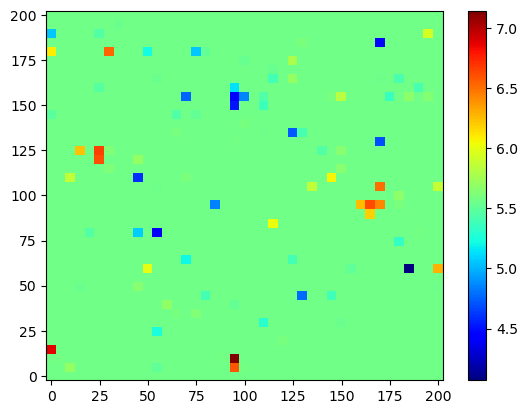

In [1148]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,ZgKR.reshape(len(grid),len(grid)), cmap='jet')
#plt.plot(Data['x'],Data['y'],'r.')
cbar = fig.colorbar(cax)
plt.show()

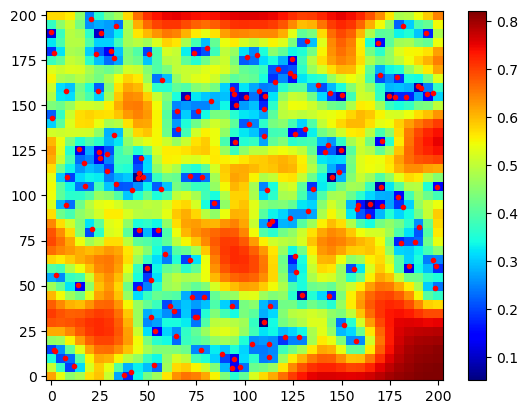

In [874]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.pcolor(XG1,XG2,varZgKR.reshape(len(grid),len(grid)), cmap='jet')
#plt.plot(Data['x'],Data['y'],'r.')
cbar = fig.colorbar(cax)
plt.plot(geo_stats['x'],geo_stats['y'],'r.')
plt.show()

Comparison with an official Kriging Software
==

https://github.com/GeoStat-Framework/PyKrige/blob/main/src/pykrige/ok.py

In [539]:
from pykrige import OrdinaryKriging as ok

In [10]:
import matplotlib.pyplot as plt

In [567]:
OK = OrdinaryKriging(
    Data['x'],
    Data['y'],
    Data['z'],
    variogram_model="exponential",
    #variogram_parameters= {'sill': 0.78, 'range': 45, 'nugget': 0.0239},
    verbose=False,
    enable_plotting=False,
)


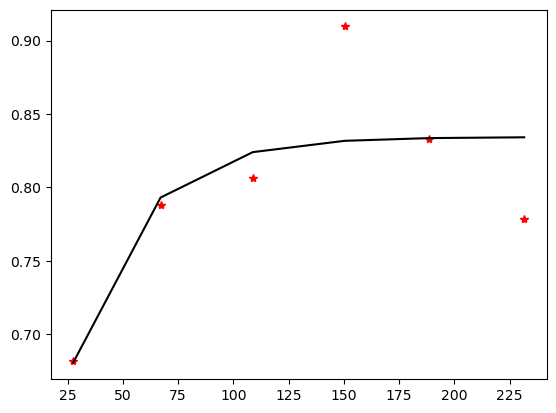

In [608]:
OK.display_variogram_model()

In [613]:
OK.get_variogram_points()

(array([ 27.54108388,  67.04556075, 108.78273749, 150.42293856,
        188.7023761 , 231.62041355]),
 array([0.68070706, 0.79305617, 0.8240144 , 0.83172292, 0.83357452,
        0.83412112]))

In [569]:
OK.variogram_model_parameters

array([ 0.38412894, 90.12966983,  0.45016446])

In [ ]:
    Nugget = 0.0239
    Sill = 0.78
    Range = 45;

In [606]:
OK.

TypeError: exponential_variogram_model() missing 2 required positional arguments: 'm' and 'd'

In [570]:
z, ss = OK.execute("grid", np.arange(0.0,205.0,5.0), np.arange(0.0,205.0,5.0))

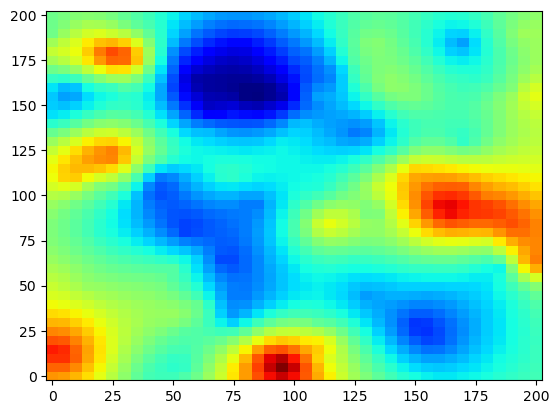

In [571]:
plt.pcolor(XG1,XG2,z.reshape(41,41), cmap='jet')

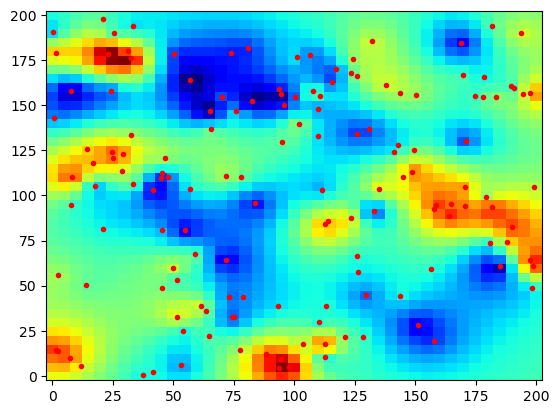

In [565]:
plt.pcolor(XG1,XG2,z.reshape(41,41), cmap='jet')
plt.plot(geo_stats['x'],geo_stats['y'],'r.')

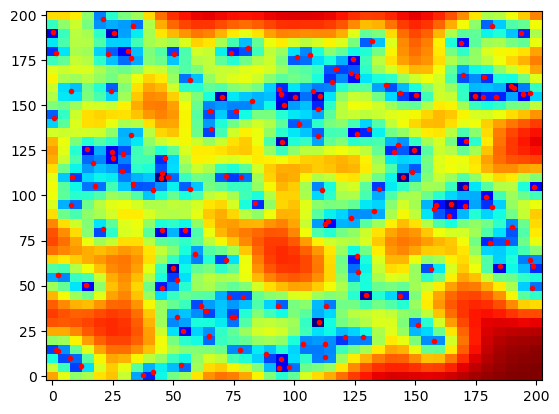

In [566]:
plt.pcolor(XG1,XG2,ss.reshape(41,41), cmap='jet')
plt.plot(geo_stats['x'],geo_stats['y'],'r.')

and with gstools
==

other resources (mainly youtube for geostatspy)

 - https://github.com/GeostatsGuy/GeostatsPy
 - https://michaelpyrcz.com/
 
 
- https://geostat-framework.org/
 
- https://geostat-framework.readthedocs.io/projects/gstools/en/stable/examples/05_kriging/01_ordinary_kriging.html#sphx-glr-examples-05-kriging-01-ordinary-kriging-py

pip install gstools

In [1]:
import gstools as gs

In [2]:
model=gs.Exponential(latlon=False)

In [8]:
lagsEst,Vario=gs.vario_estimate( Data['x'],Data['y'],Data['z'])

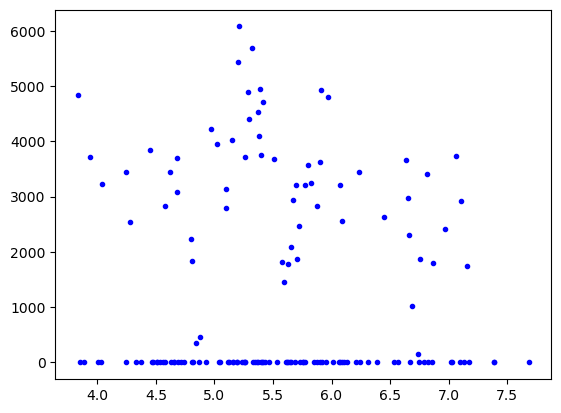

In [12]:
plt.plot(lagsEst,Vario,'b.')

In [16]:
#model.fit_variogram(lagsEst,Vario, nugget=True)

In [17]:
#ax = model.plot("variogram", x_max=max(lagsEst))
#ax.scatter(lagsEst, Vario)
#print(model)

In [ ]:
gs.krige.Ordinary()

In [372]:
np.arange(0,205,5).shape

(41,)

In [373]:
R = np.arange(0,200+5,5) 
Xg1,Xg2 = np.meshgrid(R,R)

In [379]:
(len(Xg1)**2)

1681

In [380]:
D=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )
#G    =0.5*(Z1-Z2)**2

In [382]:
x=geo_stats['x']

In [383]:
D2 = D*(np.diag(x*np.nan)+1)
D2m = np.zeros(len(D2))

In [390]:
D2[0:3,0:3]

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

Another example is shown here:
==

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
Data=np.array(([1,1,3],
              [6,1,4],
              [9,6.5,2],
              [5,4.2,4],
              [2.5,3.9,6],
              [4.7,3.3,0]
              ))

In [19]:
Data

array([[1. , 1. , 3. ],
       [6. , 1. , 4. ],
       [9. , 6.5, 2. ],
       [5. , 4.2, 4. ],
       [2.5, 3.9, 6. ],
       [4.7, 3.3, 0. ]])

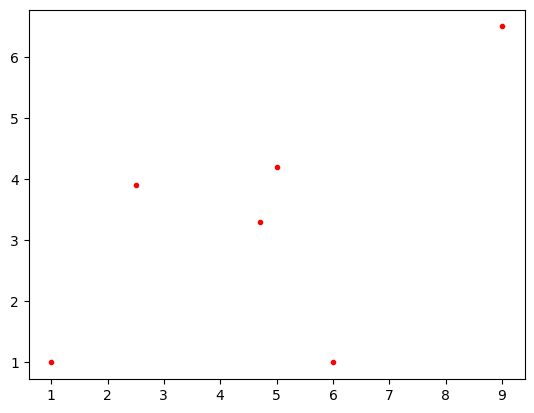

In [20]:
plt.plot(Data[:,0],Data[:,1],'r.')

In [21]:
X1,X2=np.meshgrid(Data[:,0],Data[:,0])
Y1,Y2=np.meshgrid(Data[:,1],Data[:,1])
Dist=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )

In [22]:
Z1,Z2=np.meshgrid(Data[:,2],Data[:,2])

In [23]:
0.5*(Z1-Z2)**2   # emperical variogram

array([[ 0. ,  0.5,  0.5,  0.5,  4.5,  4.5],
       [ 0.5,  0. ,  2. ,  0. ,  2. ,  8. ],
       [ 0.5,  2. ,  0. ,  2. ,  8. ,  2. ],
       [ 0.5,  0. ,  2. ,  0. ,  2. ,  8. ],
       [ 4.5,  2. ,  8. ,  2. ,  0. , 18. ],
       [ 4.5,  8. ,  2. ,  8. , 18. ,  0. ]])

In [25]:
Dist[:,:]

array([[0.        , 5.        , 9.70824392, 5.12249939, 3.26496554,
        4.35660418],
       [5.        , 0.        , 6.26498204, 3.35261092, 4.54532727,
        2.64196896],
       [9.70824392, 6.26498204, 0.        , 4.6141088 , 7.00071425,
        5.36003731],
       [5.12249939, 3.35261092, 4.6141088 , 0.        , 2.51793566,
        0.9486833 ],
       [3.26496554, 4.54532727, 7.00071425, 2.51793566, 0.        ,
        2.28035085],
       [4.35660418, 2.64196896, 5.36003731, 0.9486833 , 2.28035085,
        0.        ]])

In [26]:
Dist2=np.array(([0.0,5.0,9.8,5.0,3.2,4.3],
                [5.0,0.0,6.3,3.6,4.4,2.9],
                [9.8,6.3,0.0,5.0,7.2,5.5],
                [5.0,3.6,5.0,0.0,2.3,1.0],
                [3.2,4.4,7.2,2.3,0.0,2.0]
              ))

In [27]:
Dist2

array([[0. , 5. , 9.8, 5. , 3.2, 4.3],
       [5. , 0. , 6.3, 3.6, 4.4, 2.9],
       [9.8, 6.3, 0. , 5. , 7.2, 5.5],
       [5. , 3.6, 5. , 0. , 2.3, 1. ],
       [3.2, 4.4, 7.2, 2.3, 0. , 2. ]])

In [28]:
#linear model

#exponential model



#sperical model
h = 0

def gamma(h):
    c0= 2.5
    c1= 7.5
    a= 10.0
    return c0+c1*( 3*h/(2*a) - (1/2)* (h/a)**3 )


gamma(Dist2[0:5,:5])

array([[2.5       , 7.65625   , 9.99553   , 7.65625   , 5.97712   ],
       [7.65625   , 2.5       , 8.64982375, 6.37504   , 7.13056   ],
       [9.99553   , 8.64982375, 2.5       , 7.65625   , 9.20032   ],
       [7.65625   , 6.37504   , 7.65625   , 2.5       , 5.04187375],
       [5.97712   , 7.13056   , 9.20032   , 5.04187375, 2.5       ]])

In [29]:
A=np.ones((6,6))
A[5,5]=0
A[:5,:5]=gamma(Dist2[0:5,:5])

In [31]:
A[:,1:6]

array([[7.65625   , 9.99553   , 7.65625   , 5.97712   , 1.        ],
       [2.5       , 8.64982375, 6.37504   , 7.13056   , 1.        ],
       [8.64982375, 2.5       , 7.65625   , 9.20032   , 1.        ],
       [6.37504   , 7.65625   , 2.5       , 5.04187375, 1.        ],
       [7.13056   , 9.20032   , 5.04187375, 2.5       , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.        ]])

In [32]:
b=np.ones((6,1))
b[:5]=gamma(Dist2[:5,5].reshape(5,1))

In [33]:
b

array([[7.03934875],
       [5.67104125],
       [8.06359375],
       [3.62125   ],
       [4.72      ],
       [1.        ]])

In [37]:
np.linalg.inv(A)[:3,:5]

array([[-0.17053346,  0.04978329,  0.02106541, -0.02028042,  0.11996518],
       [ 0.04978329, -0.16863418,  0.03240143,  0.07488819,  0.01156127],
       [ 0.02106541,  0.03240143, -0.11109319,  0.06469759, -0.00707124]])

In [38]:
import scipy as sp

sp.linalg.inv(A)[:3,:5]

array([[-0.17053346,  0.04978329,  0.02106541, -0.02028042,  0.11996518],
       [ 0.04978329, -0.16863418,  0.03240143,  0.07488819,  0.01156127],
       [ 0.02106541,  0.03240143, -0.11109319,  0.06469759, -0.00707124]])

In [39]:
np.dot(np.linalg.inv(A),b)

array([[ 0.01738274],
       [ 0.18145251],
       [-0.00624075],
       [ 0.60050305],
       [ 0.20690245],
       [-0.16525653]])

In [40]:
np.dot(np.dot(np.linalg.inv(A),b).T,Data[:,2])

array([4.40890366])

the kriging variance:


In [43]:
np.sqrt(np.dot(b.T,np.dot(np.linalg.inv(A),b)))

array([[2.02162303]])

another example
http://www.stat.ucla.edu/~nchristo/statistics_c173_c273/c173c273_ordinary_kriging.pdf 

In [77]:
Data=np.array(([65,137,0], 
              [61, 139, 477],
              [63, 140, 696],
              [64, 129, 227],
              [68, 128, 646],
              [71, 140, 606],
              [73, 141, 791],
              [75, 128, 783]              
              ))

In [78]:
Data

array([[ 65, 137,   0],
       [ 61, 139, 477],
       [ 63, 140, 696],
       [ 64, 129, 227],
       [ 68, 128, 646],
       [ 71, 140, 606],
       [ 73, 141, 791],
       [ 75, 128, 783]])

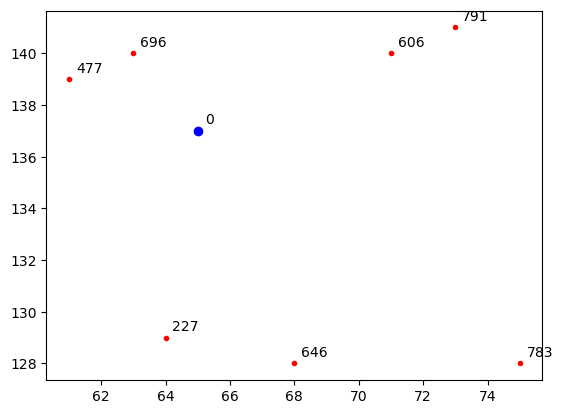

In [82]:
plt.plot(Data[1:,0],Data[1:,1],'r.')
plt.plot(Data[0,0],Data[0,1],'bo')
labels=Data[:,2]
# Add labels to each point
for i, label in enumerate(labels):
    plt.annotate(label, (Data[i,0], Data[i,1]), xytext=(5, 5), textcoords='offset points')


In [83]:
X1,X2=np.meshgrid(Data[:,0],Data[:,0])
Y1,Y2=np.meshgrid(Data[:,1],Data[:,1])
Dist=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )

In [91]:
Dist[:,5:]

array([[ 6.70820393,  8.94427191, 13.45362405],
       [10.04987562, 12.16552506, 17.80449381],
       [ 8.        , 10.04987562, 16.97056275],
       [13.03840481, 15.        , 11.04536102],
       [12.36931688, 13.92838828,  7.        ],
       [ 0.        ,  2.23606798, 12.64911064],
       [ 2.23606798,  0.        , 13.15294644],
       [12.64911064, 13.15294644,  0.        ]])

In [92]:
#exponential model
def gamma(h):

    return 10*( 1 - np.exp(-h/3.33 ) )


In [99]:
A=np.ones((8,8))
A[7,7]=0
A[:7,:7]=gamma(Dist[1:,1:])

In [135]:
A[:,:4]

array([[0.        , 4.89054263, 9.56510127, 9.80068161],
       [4.89054263, 0.        , 9.63735836, 9.79836957],
       [9.56510127, 9.63735836, 0.        , 7.10085683],
       [9.80068161, 9.79836957, 7.10085683, 0.        ],
       [9.51100136, 9.09499726, 9.80068161, 9.75632611],
       [9.74094781, 9.51100136, 9.88940931, 9.8474273 ],
       [9.9523613 , 9.9388044 , 9.63735836, 8.77800717],
       [1.        , 1.        , 1.        , 1.        ]])

In [108]:
b=np.ones((8,1))
b[:7]=gamma(Dist[0,1:].reshape(7,1))

In [111]:
b

array([[7.38934454],
       [6.61336446],
       [9.11176002],
       [9.42091945],
       [8.66609672],
       [9.31844781],
       [9.82404768],
       [1.        ]])

In [113]:
w=np.dot(np.linalg.inv(A),b)

In [116]:
np.sum(w[:-1])

1.0000000000000007

In [117]:
w

array([[0.17291501],
       [0.31766253],
       [0.12872237],
       [0.08644948],
       [0.15106209],
       [0.05732138],
       [0.08586713],
       [0.90759901]])

In [124]:
Data[1:,2]

array([477, 696, 227, 646, 606, 791, 783])

In [134]:
w,b

(array([[0.17291501],
        [0.31766253],
        [0.12872237],
        [0.08644948],
        [0.15106209],
        [0.05732138],
        [0.08586713],
        [0.90759901]]),
 array([[7.38934454],
        [6.61336446],
        [9.11176002],
        [9.42091945],
        [8.66609672],
        [9.31844781],
        [9.82404768],
        [1.        ]]))

now calculate the interpolated value at position [65,137]:

In [130]:
print(np.dot(w[:-1].T,Data[1:,2]))

[592.75872889]


and the variance for the value:

In [131]:
print(np.dot(w.T,b))

[[8.96029444]]


ok the result is fine!

Calculate the same example in another way, so that the point to be interpolated is the last value

In [137]:
Data2=np.array(([61, 139, 477],
              [63, 140, 696],
              [64, 129, 227],
              [68, 128, 646],
              [71, 140, 606],
              [73, 141, 791],
              [75, 128, 783],
              [65,137,0],
              ))

In [138]:
X1,X2=np.meshgrid(Data[:,0],Data[:,0])
Y1,Y2=np.meshgrid(Data[:,1],Data[:,1])
Dist=np.sqrt( (X1-X2)**2 + (Y1-Y2)**2  )

In [142]:
Dist[:,5:]

array([[12.16552506, 17.80449381,  4.47213595],
       [10.04987562, 16.97056275,  3.60555128],
       [15.        , 11.04536102,  8.06225775],
       [13.92838828,  7.        ,  9.48683298],
       [ 2.23606798, 12.64911064,  6.70820393],
       [ 0.        , 13.15294644,  8.94427191],
       [13.15294644,  0.        , 13.45362405],
       [ 8.94427191, 13.45362405,  0.        ]])

In [146]:
A=np.ones((8,8))
A[7,7]=0
A[:7,:7]=gamma(Dist[:7,:7])

In [149]:
A[:,4:]

array([[9.51100136, 9.74094781, 9.9523613 , 1.        ],
       [9.09499726, 9.51100136, 9.9388044 , 1.        ],
       [9.80068161, 9.88940931, 9.63735836, 1.        ],
       [9.75632611, 9.8474273 , 8.77800717, 1.        ],
       [0.        , 4.89054263, 9.77596358, 1.        ],
       [4.89054263, 0.        , 9.80742097, 1.        ],
       [9.77596358, 9.80742097, 0.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        ]])

In [157]:
b=np.ones((8,1))
b[:7]=gamma(Dist[:7,7].reshape(7,1))

In [155]:
b

array([[7.38934454],
       [6.61336446],
       [9.11176002],
       [9.42091945],
       [8.66609672],
       [9.31844781],
       [9.82404768],
       [1.        ]])

In [158]:
w=np.dot(np.linalg.inv(A),b)

In [159]:
w

array([[0.17291501],
       [0.31766253],
       [0.12872237],
       [0.08644948],
       [0.15106209],
       [0.05732138],
       [0.08586713],
       [0.90759901]])

In [161]:
print(np.dot(w[:-1].T,Data[:-1,2]))

[592.75872889]


In [162]:
print(np.dot(w.T,b))

[[8.96029444]]


In [3]:
import pykrige
#https://www.youtube.com/watch?v=mhveiX_d9Q8
#*Resources*
#Code and Data: https://github.com/deepcharts/Kriging...
#Data Source: https://www.epa.gov/outdoor-air-quali...
#Variogram Diagram Explanation: https://en.wikipedia.org/wiki/Variogr...
#PyKrige Python Documentation: https://geostat-framework.readthedocs...


Assumptions of the Kriging Model:
    1. Stationarity - Stationaerer Gaussscher Prozess
    2. Constant Variogram
    
    see ritvikmath (youtube) https://www.youtube.com/watch?v=J-IB4_QL7Oc
    https://geostat-framework.org/

On Gaussian Processes
---

Sources/References :
   - Trauth, M.H. (2007) MATLAB Recipes for Earth Sciences – Second Edition. Springer International Publishing, ~500 p., Supplementary Electronic Material, Hardcover, ISBN: 978-3-540-72748-4. (MRES http://mres.uni-potsdam.de/)

## Natural Neighbours Interpolation <a name="natneigh"> </a>

## Triangulation  <a name="triang"> </a>